In [77]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
sys.path.append('../')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
data=pd.read_csv("../simulations/evaluations3/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv",index_col=False)
data.head()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,1,AUGGGCGGGAACCC,0.486077,5.787746,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
1,1,GUGGGCAGCACCCC,0.450376,5.100348,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
2,1,AUGGGCGGGACGCC,0.519031,4.480660,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
3,1,CUGGGCCUGACUCC,0.403691,4.055888,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
4,1,AUGGGCAUGAGCCC,0.508046,3.415833,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1


In [4]:
data.landscape_id.unique()

array(['B1L14RNA1', '-1', 'B1L50RNA1', 'B1L100RNA1'], dtype=object)

In [73]:
sub_data=data[(data.model_type.str.startswith("NAMb_ss1"))&\
              (data.landscape_id=='B1L14RNA1')]

In [74]:
sub_data[["true_score","model_score"]].corr("pearson")

,true_score,model_score
true_score,1.0,1.0
model_score,1.0,1.0


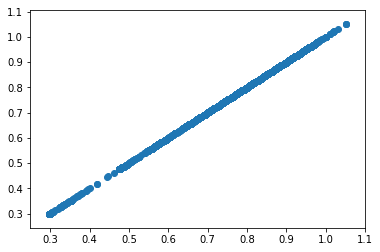

In [75]:
plt.scatter(sub_data["true_score"],sub_data["model_score"])

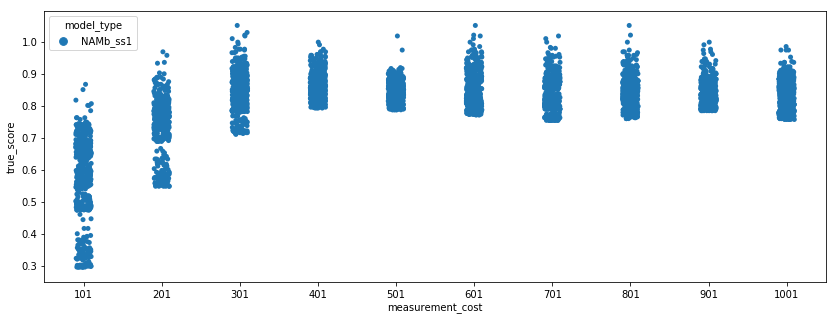

In [77]:
plt.figure(figsize=(14,5))
sns.stripplot(x="measurement_cost",y="true_score",hue="model_type",data=sub_data)

In [25]:
data["start_id"].unique()

array(['startRNAL14_0', '-1', 'startRNAL14_1', 'startRNAL14_2',
       'startRNAL14_3', 'startRNAL14_4', 'startRNAL50_0', 'startRNAL50_1',
       'startRNAL50_2', 'startRNAL50_3', 'startRNAL50_4',
       'startRNAL100_0', 'startRNAL100_1', 'startRNAL100_2',
       'startRNAL100_3', 'startRNAL100_4'], dtype=object)

In [26]:
import timeit

In [27]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)

In [55]:
outcomes=pd.DataFrame(columns=["landscape_id","start_id","model_type","batch","max_fitness","cum_max_fitness"])
for landscape in data.landscape_id.unique():
    if landscape==str(-1) or start_id==str(-1):
        continue
    print(landscape)
    valid_start_ids=[x for x in data.start_id.unique() if landscape[landscape.index("L"): landscape.index("R")] in x]
    for start_id in valid_start_ids:
        for noisy_model in data.model_type.unique():
            sub_data = data[(data.landscape_id==landscape)&\
                           (data.start_id==start_id)&\
                           (data.model_type==noisy_model)] 
            cum_fit=0
            for batch, max_fitness in enumerate(get_top_sequence_per_batch(sub_data)):
                if max_fitness>cum_fit:
                   cum_fit = max_fitness 
                outcomes = outcomes.append(pd.DataFrame.from_records([{"landscape_id":landscape,\
                                      "start_id":start_id,\
                                      "model_type": noisy_model,\
                                      "batch": batch+1, \
                                      "max_fitness": max_fitness,\
                                      "cum_max_fitness": cum_fit}])) 

B1L14RNA1


/anaconda3/envs/tf3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


B1L50RNA1
B1L100RNA1


In [57]:
outcomes.head()

,batch,cum_max_fitness,landscape_id,max_fitness,model_type,start_id
0,1,0.735981,B1L14RNA1,0.735981,NAMb_ss0,startRNAL14_0
0,2,0.785412,B1L14RNA1,0.785412,NAMb_ss0,startRNAL14_0
0,3,0.785412,B1L14RNA1,0.785412,NAMb_ss0,startRNAL14_0
0,4,0.887021,B1L14RNA1,0.887021,NAMb_ss0,startRNAL14_0
0,5,0.887021,B1L14RNA1,0.840336,NAMb_ss0,startRNAL14_0


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


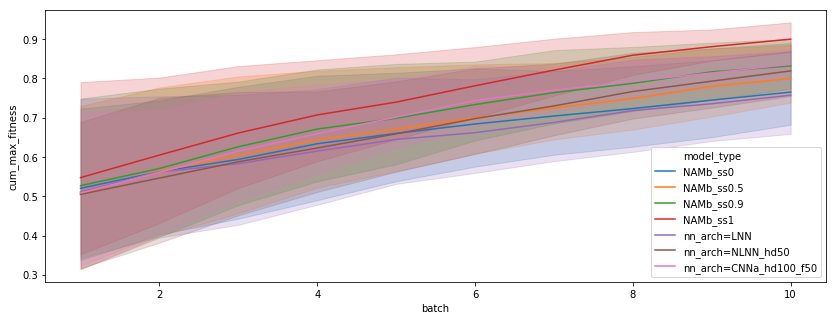

In [69]:
plt.figure(figsize=(14,5))

sns.lineplot(x="batch",y="cum_max_fitness",hue="model_type",data= outcomes[outcomes.landscape_id=="B1L50RNA1"])